# Stroke Predictor

By: Nain415

Inspired by: Paul Schrimpf, Chase Coleman, Spencer Lyon, and Jesse Perla.  QuantEcon DataScience.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import linear_model
%matplotlib inline

The project uses a dataset that is publicly accessible at kaggle: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset.

It involves 5109 patients, and some variables of interest include:

- gender
- age
- hypertension: whether the patient regularly experiences high blood pressure.
- heart_disease: whether the patient suffers from any variety of heart diseases.
- avg_glucose_level: a measure of blood sugar.
- bmi: a measure of body fat that's typically estimated by one's height & weight.
- smoking_status: whether a patient smokes, doesn't smoke, or has formerly smoked.
- stroke: did the patient eventually have a stroke?

We'll investigate some questions concerning the interaction between these variables, and stroke probability.  The final goal will be to predict a person's probability of stroke through his age, gender, BMI, and whether he smokes or not, because they're variables that anyone can provide.

In [2]:
stroke_data = pd.read_csv("https://github.com/Nain415/econ323project/raw/main/healthcare-dataset-stroke-data.csv", na_values = ["Unknown", "NaN"])
#stroke_data = pd.read_csv("https://github.com/Nain415/econ323project/raw/main/healthcare-dataset-stroke-data.csv")
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# The relationship between smoking and having a stroke.

In [3]:
stroke_data_smoke = stroke_data[["smoking_status", "stroke"]]

In [4]:
stroke_data_smoke = stroke_data_smoke.dropna();

In [5]:
smoked_stroke = stroke_data_smoke[stroke_data_smoke["smoking_status"] == "smokes"]
formerly_smoked_stroke = stroke_data_smoke[stroke_data_smoke["smoking_status"] == "formerly smoked"]
non_smoker_stroke = stroke_data_smoke[stroke_data_smoke["smoking_status"] == "never smoked"]

smoked_stroke_true = smoked_stroke[smoked_stroke["stroke"] == 1]
formerly_smoked_stroke_true = formerly_smoked_stroke[formerly_smoked_stroke["stroke"] == 1]
non_smoker_stroke_true = non_smoker_stroke[non_smoker_stroke["stroke"] == 1]

In [6]:
Ratios = [len(smoked_stroke_true)/len(smoked_stroke), len(formerly_smoked_stroke_true)/len(formerly_smoked_stroke), len(non_smoker_stroke_true)/len(non_smoker_stroke)]

Text(0.5, 0.98, 'Probability of Stroke (Limited to dataset)')

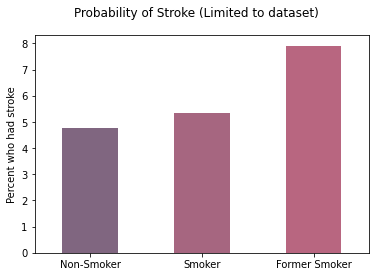

In [7]:
#uses code from my submission of Problem Set 7 for Econ 323 in Fall 2021 at UBC Vancouver
df = pd.DataFrame(
    {"values": [Ratios[2]*100, Ratios[0]*100, Ratios[1]*100]},
    index=["Non-Smoker", "Smoker", "Former Smoker"]
)

fig, ax = plt.subplots()

df.plot(kind='bar', rot=0, ax=ax, y="values", legend=False, color = [(0.5,0.4,0.5), (0.65,0.4,0.5), (0.72,0.4,0.5)])
ax.set_ylabel("Percent who had stroke")
fig.suptitle("Probability of Stroke (Limited to dataset)")

As expected, smokers and former smokers have a higher probability of a stroke.  Curiously, the probability of a stroke was much higher for former smokers than any other category.  In summary, smoking is evidenced to inflict permanent harm to one's heart health.

One possible explanation is that former smokers are of an advanced age compared to others, and I suspect there is a relationship between age and stroke probability.

# The relationship between age and having a stroke.

In [8]:
#uses code from my submission of Problem Set 7 for Econ 323 in Fall 2021 at UBC Vancouver

stroke_data_age = stroke_data[["age", "stroke"]]
one_bin = stroke_data_age[stroke_data_age["age"] < 10]
two_bin = stroke_data_age[(stroke_data_age["age"] < 20) & (stroke_data_age["age"] >= 10)]
three_bin = stroke_data_age[(stroke_data_age["age"] < 30) & (stroke_data_age["age"] >= 20)]
four_bin = stroke_data_age[(stroke_data_age["age"] < 40) & (stroke_data_age["age"] >= 30)]
five_bin = stroke_data_age[(stroke_data_age["age"] < 50) & (stroke_data_age["age"] >= 40)]
six_bin = stroke_data_age[(stroke_data_age["age"] < 60) & (stroke_data_age["age"] >= 50)]
seven_bin = stroke_data_age[(stroke_data_age["age"] < 70) & (stroke_data_age["age"] >= 60)]
eight_bin = stroke_data_age[stroke_data_age["age"] >= 70]

stroke_victims = [one_bin[one_bin["stroke"] == 1],
two_bin[two_bin["stroke"] == 1],
three_bin[three_bin["stroke"] == 1],
four_bin[four_bin["stroke"] == 1],
five_bin[five_bin["stroke"] == 1],
six_bin[six_bin["stroke"] == 1],
seven_bin[seven_bin["stroke"] == 1],
eight_bin[eight_bin["stroke"] == 1]
];

Ratios2 = [len(stroke_victims[0])/len(one_bin), 
            len(stroke_victims[1])/len(two_bin),
            len(stroke_victims[2])/len(three_bin),
            len(stroke_victims[3])/len(four_bin),
            len(stroke_victims[4])/len(five_bin),
            len(stroke_victims[5])/len(six_bin),
            len(stroke_victims[6])/len(seven_bin),
            len(stroke_victims[7])/len(eight_bin)
            ]
#formerly_smoked_stroke[formerly_smoked_stroke["stroke"] == 1]


Text(0.5, 0.98, 'Probability of Stroke (Limited to dataset)')

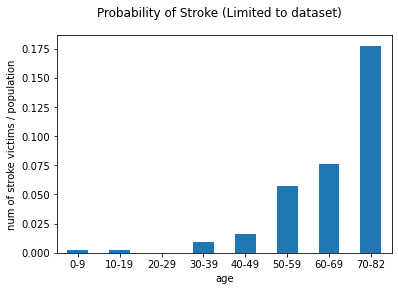

In [9]:
df = pd.DataFrame(
    {"values": Ratios2},
    index=["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-82"]
)

fig, ax = plt.subplots()

df.plot(kind='bar', rot=0, ax=ax, y="values", legend=False)

ax.set_xlabel("age")
ax.set_ylabel("num of stroke victims / population")
fig.suptitle("Probability of Stroke (Limited to dataset)")

It seems that there is indeed a trend of increasing stroke chance with age.  There are striking increases in stroke probability beginning at ages 50-59, and after one's 60s.  The eldest patient in the dataset was 82 years old.

I interpret the non-zero probabilities from ages 0-19, along with the gap from 20-29, to indicate that undiagnosed heart defects from birth tend to surface earlier rather than later.

Additionally, the rise at 50-59 and 70+ is in harmony with most of society's definitions of middle-age and elderhood.  However, age is typically synonymous with inactivity, and a sedentary life is synonymous with weight gain.  Therefore, I'm curious if much of this increase in stroke probability can be explained by BMI; after all, it's not an unknown fact that high BMI individuals suffer from health complications.

First, I'll examine whether I'm correct in relating BMI and age.

# Are age and bmi connected?

In [10]:
age_bmi_data = stroke_data[["bmi", "age"]]
age_bmi_data = age_bmi_data.dropna();
age_bmi_data = age_bmi_data[age_bmi_data["bmi"] < 70] #remove the few extreme outliers

[23.81450739]
[0.11738717]


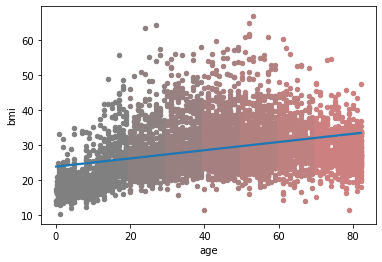

In [11]:
fig, ax = plt.subplots()
age_bmi_data[age_bmi_data["age"] < 20].plot(kind="scatter", x="age", y="bmi", ax=ax, color=(0.5,0.5,0.5))
age_bmi_data[(age_bmi_data["age"] < 30) & (age_bmi_data["age"] >= 20) ].plot(kind="scatter", x="age", y="bmi", ax=ax, color=(0.55,0.5,0.5))
age_bmi_data[(age_bmi_data["age"] < 40) & (age_bmi_data["age"] >= 30) ].plot(kind="scatter", x="age", y="bmi", ax=ax, color=(0.6,0.5,0.5))
age_bmi_data[(age_bmi_data["age"] < 50) & (age_bmi_data["age"] >= 40) ].plot(kind="scatter", x="age", y="bmi", ax=ax, color=(0.65,0.5,0.5))
age_bmi_data[(age_bmi_data["age"] < 60) & (age_bmi_data["age"] >= 50) ].plot(kind="scatter", x="age", y="bmi", ax=ax, color=(0.7,0.5,0.5))
age_bmi_data[(age_bmi_data["age"] < 70) & (age_bmi_data["age"] >= 60) ].plot(kind="scatter", x="age", y="bmi", ax=ax, color=(0.75,0.5,0.5))
age_bmi_data[(age_bmi_data["age"] >= 70)].plot(kind="scatter", x="age", y="bmi", ax=ax, color=(0.8,0.5,0.5))
#age_bmi_data.plot(x='bmi', y='age', style='o')

#code borrowed from https://datascience.quantecon.org/applications/regression.html
sns.regplot(data=age_bmi_data, x="age", y="bmi", scatter=False, ax=ax)

age_bmi_lr_model = linear_model.LinearRegression();
age_bmi_lr_model.fit(age_bmi_data[["age"]], age_bmi_data[["bmi"]]);
beta_0 = age_bmi_lr_model.intercept_
beta_1 = age_bmi_lr_model.coef_[0]

print(beta_0)
print(beta_1)


There appears to be a relationship between BMI and age, albeit not terribly extreme.  Linear regression estimates that they're related by the equation:

$$BMI \approx 23.81 + (0.12)age + \epsilon$$

Where $\epsilon$ is the error term.  Without even doing a direct computation for relating BMI and stroke probability, because of BMI's connection with age, and age's relation to stroke probability, we can say with some degree of confidence that increased BMI is tied with increased stroke probability.  For the sake of completion, and to satisfy any curiosity, it's best to next evaluate the final variable of interest's predictive power: gender.  Once that evaluation complete, I believe we'll be confident that our variable choices are reasonable, and we can use multiple regression to predict the probability a person will suffer from a stroke.

# Gender and stroke chance

In [12]:
gender_stroke_data = stroke_data[["gender", "stroke"]]
gender_stroke_data.dropna();

In [13]:
gender_stroke_data['gender'] = gender_stroke_data['gender'].map({'Female': 1, 'Male': 0})

/tmp/ipykernel_1105/3699367289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_stroke_data['gender'] = gender_stroke_data['gender'].map({'Female': 1, 'Male': 0})


In [14]:
male_ratio = len(gender_stroke_data[(gender_stroke_data['gender'] == 0) & (gender_stroke_data['stroke'] == 1)])/len(gender_stroke_data[gender_stroke_data['gender'] == 0])
female_ratio = len(gender_stroke_data[(gender_stroke_data['gender'] == 1) & (gender_stroke_data['stroke'] == 1)])/len(gender_stroke_data[gender_stroke_data['gender'] == 1])

Text(0.5, 0.98, 'Probability of Stroke by Gender (Limited to dataset)')

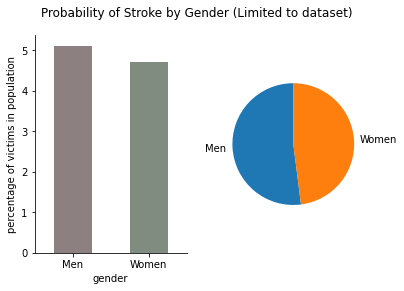

In [15]:
#uses code from my submission of Problem Set 7 for Econ 323 in Fall 2021 at UBC Vancouver
#also https://datascience.quantecon.org/applications/visualization_rules.html
df = pd.DataFrame(
    {"values": [male_ratio*100, female_ratio*100]},
    index=["Men", "Women"]
)

fig, ax = plt.subplots(1, 2)

df.plot(kind='bar', rot=0, ax=ax[0], y="values", legend=False, color=[(0.55,0.5,0.5), (0.5,0.55,0.5)])
df.plot(kind='pie', ax=ax[1], y="values", legend=False,  startangle=90)
ax[0].set_xlabel("gender")
ax[0].set_ylabel("percentage of victims in population")
ax[1].set_ylabel("")

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)


fig.suptitle("Probability of Stroke by Gender (Limited to dataset)")

In the given dataset, there seems to be a slight tendency for men to suffer from strokes at a greater rate than women, and so it probably is a variable worth keeping in the final prediction.

# Stroke Prediction Calculator


In [16]:
stroke_data_filtered = stroke_data[["gender", "age", "bmi", "smoking_status", "stroke"]]
stroke_data_filtered = stroke_data_filtered

In [17]:
stroke_data_filtered = stroke_data_filtered.dropna()
X_gender = stroke_data_filtered["gender"].map({'Female': 1, 'Male': 0})
X_smoking_status = stroke_data_filtered["smoking_status"].map({ "smokes": 1, "never smoked": 0, "formerly smoked": 1})
X = stroke_data_filtered[["age", "bmi"]]
X["gender"] = X_gender;
X["smoking_status"] = X_smoking_status;
Y = stroke_data_filtered[["stroke"]];
Y["gender"] = X_gender;

/tmp/ipykernel_1105/1278451117.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["gender"] = X_gender;
/tmp/ipykernel_1105/1278451117.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["smoking_status"] = X_smoking_status;
/tmp/ipykernel_1105/1278451117.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

### I map male -> 0 and female -> 1.  Additionally, because we've established that smoking has a positive association with stroke chance, with former smokers having the greatest connection, I map smokers -> & former smokers -> 1.0.

In [18]:
#there was one row in Gender that was causing some problems.
X.dropna(how='any', axis=0, inplace=True)
Y.dropna(how='any', axis=0, inplace=True)
Y = Y["stroke"]

/opt/conda/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [19]:
#borrowed code from https://datascience.quantecon.org/applications/regression.html
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.25)
multiple_reg_model = linear_model.LinearRegression();
multiple_reg_model.fit(X_test,Y_test);

In [20]:
print('Intercept: \n', multiple_reg_model.intercept_)
print('Coefficients: \n', multiple_reg_model.coef_)

Intercept: 
 -0.040693676526256765
Coefficients: 
 [ 0.00270593 -0.00104877 -0.02173322  0.00390817]


As expected, the contribution of BMI is negligible, probably because it's well-predicted by age.  Otherwise, the contributions of each explanatory variable is reasonable.

Multiple regression yields the following model:

$$P(stroke) \approx (0.0022)x_{age} + (0.0003)x_{bmi} - (0.0146)x_{gender} + (0.0151)x_{\text{smoking_status}}$$

## Let's predict the probability you might have a stroke, given your current circumstances:

In [22]:
#example input: (23, 26, male, never smoked)

In [40]:
U_age = input("What is your age in years?: ")

What is your age in years?:  80.0


In [41]:
U_bmi = input("What is your bmi?: ")

What is your bmi?:  23.0


In [42]:
U_gender = input("Are you male or female?: ").lower()
if U_gender == "female":
    U_gender = 1.0 
else: 
    U_gender = 0.0

Are you male or female?:  male


In [43]:
U_smoker = input("What is your smoking status?  Please reply with either: smoked or never smoked: ")
if U_smoker == "smoked":
    U_smoker = 1.0 
else: 
    U_smoker = 0.0

What is your smoking status?  Please reply with either: smoked or never smoked:  never smoked


In [44]:
print(f"By this model, the predicted probability of you suffering a stroke is: {multiple_reg_model.predict([[U_age,U_bmi,U_gender,U_smoker]])[0]*100}%.")

By this model, the predicted probability of you suffering a stroke is: 15.165875257538985%.


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
